In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)
table_name = 'trail3-2024-03-25_20-04-22'

In [3]:
tasks = pd.read_sql_query(f'select * from "{table_name}"', db)
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks.head()

,run_id,monitor_tag,start_submit,end_submit,returned,workers,tasks_per_trial,trial,app_name,completion time
0,72b7a6ec-aacc-41cd-b7ef-d2140751468e,no_monitor,1.711397e+09,1.711397e+09,1.711397e+09,8,100,0,noop,0.218695
1,a373385c-d5fa-4c50-8461-dd22babf38e4,no_monitor,1.711397e+09,1.711397e+09,1.711397e+09,8,100,1,noop,0.218682
2,198b5546-bbc3-426f-8d91-d5d1aedb887d,no_monitor,1.711397e+09,1.711397e+09,1.711397e+09,8,100,2,noop,0.220143
3,a518a0d3-f61e-4048-9e1a-fe58369ac55d,no_monitor,1.711397e+09,1.711397e+09,1.711397e+09,8,100,0,sleep10ms,0.350361
4,91c684a5-9a5e-41e2-8899-87cfce444e83,no_monitor,1.711397e+09,1.711397e+09,1.711397e+09,8,100,1,sleep10ms,0.349170


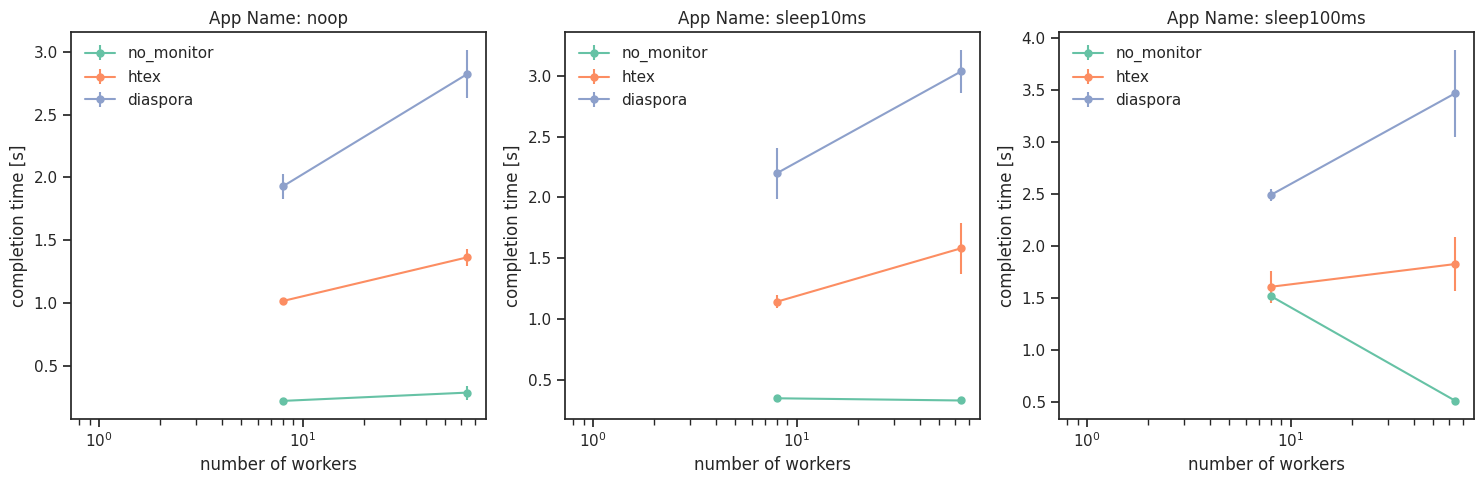

In [4]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')